## MAKE.. Images from Texts

**Welcome to this [Southampton Digital Humanities](http://digitalhumanities.soton.ac.uk/) workshop codebook.**

This is a fork of a notebook originally made by [@dazhizhong](https://twitter.com/DazhiZhong), [Github](https://github.com/DazhiZhong), Website: [dazhi.art](https://dazhi.art).

It was made by [James Baker](https://cradledincaricature.com/) for the session "[MAKE.. A Machine That Can Paint](https://www.eventbrite.co.uk/e/make-a-machine-that-can-paint-tickets-257481091877)", first held at the Digital Humanities Hub, University of Southampton, on 22 March 2022. The latest revision was for a November 2022 workshop [MAKE.. Images from Texts](https://www.eventbrite.co.uk/e/make-images-from-texts-tickets-430791568177).

This notebook uses an AI based image generator called Pixray (released in January 2022). Pixray responds to textual prompts. Tell it to draw "a cat with a hat" and it will. Tell it to draw "A wide angle photograph of a maelstrom caused by the most joyous occasion imaginable" and it will attempt to. Everything it makes is unique. The images it is trained on never appear in the output.

Info on Pixway can be found at:

- pixray Github: https://github.com/pixray/
- pixray: http://pixray.gob.io/
- pixray discord: https://discord.com/invite/GaWv2EK3tY

## Get Your Copy

You'll need to run this notebook on your Google Drive compute resources (otherwise you'll exhaust my free plan!). To do this, go to 'File', and hit 'Save a copy in Drive'. You can then close this notebook and work from your one.

**Please do not run the code blocks in this notebook until you've completed this step!**

In [1]:
#@title Setup Pixray
#@markdown Run this once by hitting the play button on the left side.
#@markdown It'll take about 5 minutes to complete (look for the tick to the left of the play button).
#@markdown Then on the top menu select "Runtime" and "Restart and Run all".
#@markdown This will make the next cell - which is the machine that paints - start work.
%%capture
pixray_version = "latest release" #@param ["latest release", "next planned release"]
branch = "master"
if pixray_version == "next planned release":
  branch = "future"
!rm -Rf pixray
!git clone --recursive --branch $branch https://github.com/pixray/pixray
!pip install -r pixray/requirements.txt
!pip install basicsr
!pip uninstall -y tensorflow 
!git clone https://github.com/pixray/diffvg
%cd diffvg
!git submodule update --init --recursive
!python setup.py install
%cd ..
!pip freeze | grep torch

import sys
sys.path.append("pixray")
import pixray


Using seed: 17115191581329948706
Loaded CLIP RN50: 224x224 and 102.01M params
Loaded CLIP ViT-B/32: 224x224 and 151.28M params
Loaded CLIP ViT-B/16: 224x224 and 149.62M params
Using device: cuda:0
Optimising using: Adam
Using text prompts: ["Juan O'Gorman (1905-1982) La Ciudad de México, 1949. Temple sobre masonite Acervo Museo de Arte Moderno. INBA/Secretaría de Cultura"]
using custom losses: edge, symmetry


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


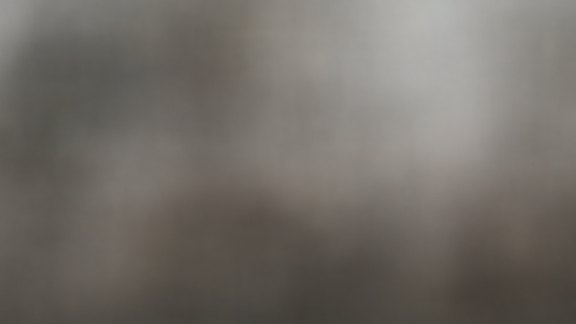

iter: 0, loss: 3.15, losses: 1.01, 0.0841, 0.956, 0.0614, 0.935, 0.0626, 0.0178, 0.02 (-0=>3.151)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


iter: 10, loss: 3.93, losses: 1.06, 0.083, 0.999, 0.0604, 0.975, 0.062, 0.0882, 0.6 (-10=>3.151)


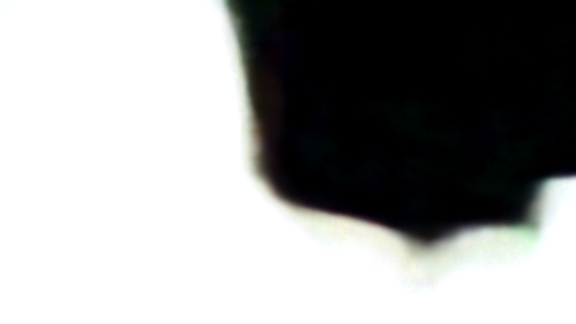

iter: 20, loss: 3.89, losses: 1.06, 0.0847, 0.992, 0.0609, 0.964, 0.0617, 0.0888, 0.575 (-20=>3.151)
iter: 30, loss: 3.81, losses: 1.07, 0.0834, 0.989, 0.0614, 0.957, 0.0614, 0.086, 0.507 (-30=>3.151)


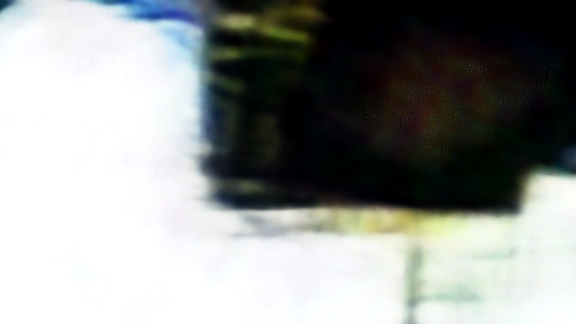

iter: 40, loss: 3.64, losses: 1.06, 0.0835, 0.973, 0.0589, 0.948, 0.0627, 0.0796, 0.374 (-40=>3.151)
iter: 50, loss: 3.41, losses: 1.02, 0.0852, 0.946, 0.0612, 0.906, 0.0624, 0.0732, 0.256 (-50=>3.151)


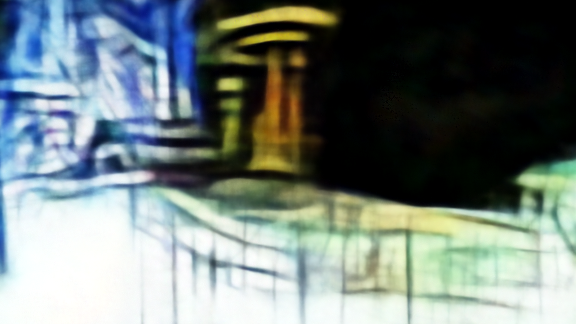

iter: 60, loss: 3.14, losses: 0.941, 0.0832, 0.889, 0.06, 0.854, 0.0627, 0.0681, 0.185 (-0=>3.143)
iter: 70, loss: 3.08, losses: 0.933, 0.0867, 0.844, 0.0631, 0.832, 0.0665, 0.0674, 0.19 (-0=>3.083)


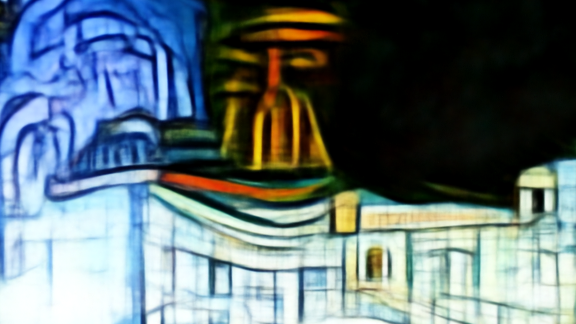

iter: 80, loss: 2.99, losses: 0.907, 0.0876, 0.828, 0.0637, 0.801, 0.0663, 0.0659, 0.168 (-1=>2.928)
iter: 90, loss: 2.87, losses: 0.882, 0.0891, 0.782, 0.0645, 0.764, 0.0659, 0.0649, 0.156 (-0=>2.868)


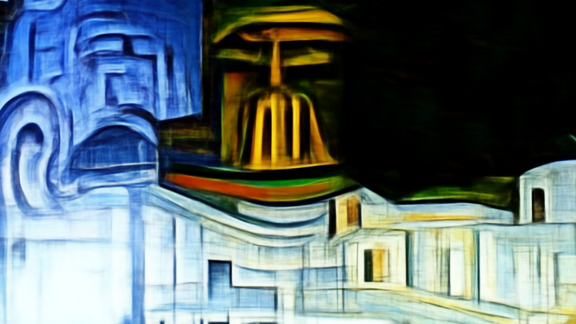

iter: 100, loss: 2.84, losses: 0.876, 0.0878, 0.776, 0.0636, 0.757, 0.0671, 0.0632, 0.151 (-3=>2.835)
iter: 110, loss: 2.79, losses: 0.851, 0.089, 0.767, 0.0644, 0.748, 0.0689, 0.062, 0.143 (-8=>2.793)


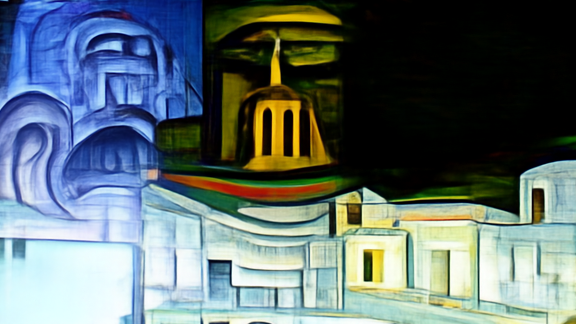

iter: 120, loss: 2.8, losses: 0.858, 0.0909, 0.761, 0.0642, 0.754, 0.0672, 0.0607, 0.14 (-5=>2.765)
iter: 130, loss: 2.79, losses: 0.861, 0.0884, 0.763, 0.065, 0.744, 0.0678, 0.061, 0.14 (-15=>2.765)


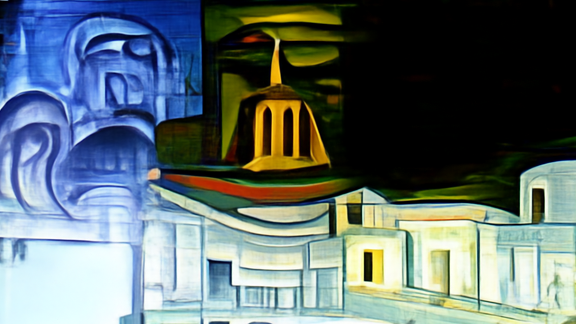

iter: 140, loss: 2.78, losses: 0.855, 0.0868, 0.757, 0.0644, 0.745, 0.0676, 0.0615, 0.141 (-5=>2.75)
iter: 150, loss: 2.81, losses: 0.868, 0.0907, 0.768, 0.0644, 0.746, 0.0667, 0.0613, 0.142 (-15=>2.75)


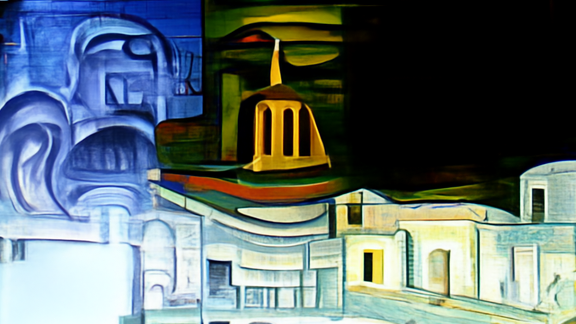

iter: 160, loss: 2.81, losses: 0.86, 0.0891, 0.769, 0.0657, 0.759, 0.0674, 0.0616, 0.143 (-25=>2.75)
iter: 170, loss: 2.74, losses: 0.85, 0.0888, 0.736, 0.0664, 0.73, 0.0679, 0.0616, 0.144 (-0=>2.745)


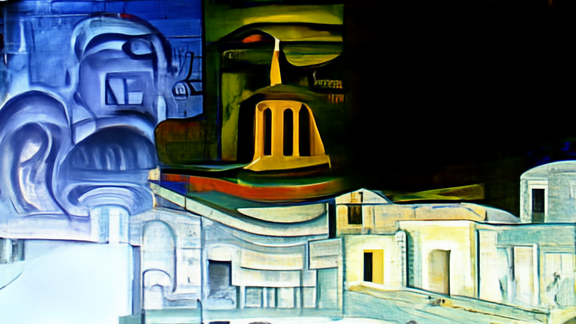

iter: 180, loss: 2.81, losses: 0.854, 0.0894, 0.774, 0.065, 0.752, 0.067, 0.0617, 0.144 (-10=>2.745)
iter: 190, loss: 2.82, losses: 0.868, 0.0878, 0.765, 0.0656, 0.754, 0.0672, 0.0617, 0.145 (-20=>2.745)


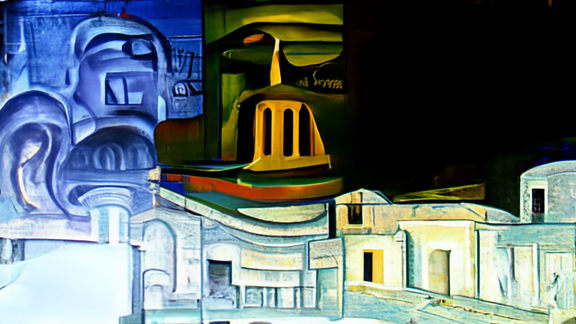

iter: 200, loss: 2.79, losses: 0.859, 0.0894, 0.757, 0.0646, 0.742, 0.0676, 0.0619, 0.145 (-30=>2.745)
iter: 210, loss: 2.76, losses: 0.848, 0.0893, 0.747, 0.0654, 0.738, 0.0683, 0.062, 0.146 (-40=>2.745)


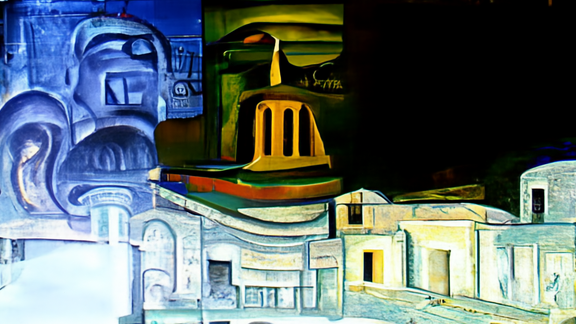

iter: 220, loss: 2.78, losses: 0.859, 0.0886, 0.747, 0.0646, 0.747, 0.0678, 0.0622, 0.147 (-50=>2.745)
Dropping learning rate
iter: 230, loss: 2.77, losses: 0.856, 0.0905, 0.741, 0.0661, 0.742, 0.0681, 0.0623, 0.148 (-0=>2.773)


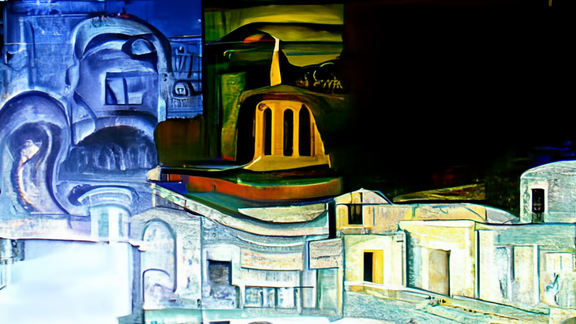

iter: 240, loss: 2.84, losses: 0.875, 0.0871, 0.772, 0.0648, 0.762, 0.0674, 0.0624, 0.148 (-10=>2.773)
iter: 250, loss: 2.81, losses: 0.858, 0.0889, 0.767, 0.0642, 0.75, 0.0669, 0.0625, 0.149 (-20=>2.773)


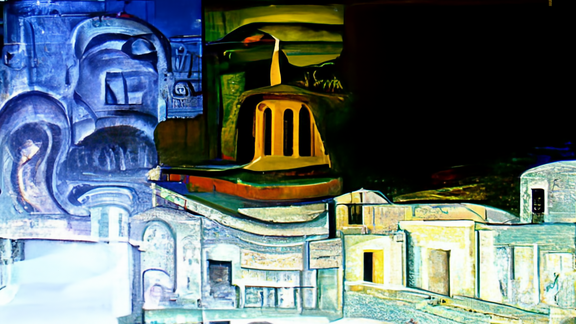

iter: 260, loss: 2.86, losses: 0.88, 0.0877, 0.784, 0.0646, 0.767, 0.0667, 0.0627, 0.15 (-30=>2.773)
iter: 270, loss: 2.83, losses: 0.866, 0.0919, 0.769, 0.0654, 0.752, 0.0683, 0.0628, 0.151 (-40=>2.773)


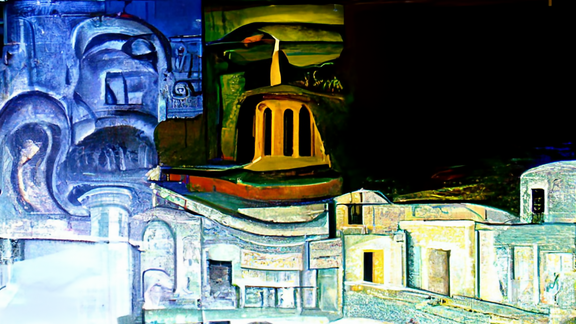

iter: 280, loss: 2.83, losses: 0.872, 0.0889, 0.766, 0.0643, 0.754, 0.0667, 0.063, 0.152 (-50=>2.773)
iter: 290, loss: 2.83, losses: 0.871, 0.0891, 0.759, 0.0657, 0.761, 0.0676, 0.0631, 0.153 (-60=>2.773)


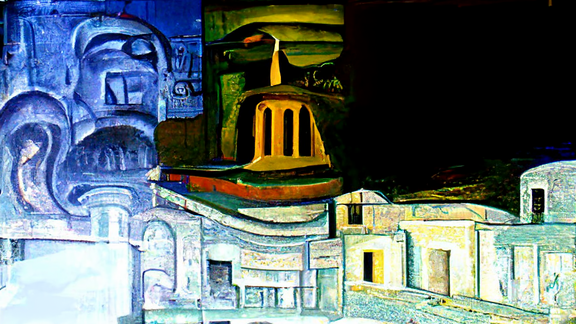

iter: 300, finished (-70=>2.773)



In [2]:
#@title Generate { vertical-output: true }
#vdiff
pixray.run(
    "Juan O'Gorman (1905-1982) La Ciudad de México, 1949. Temple sobre masonite Acervo Museo de Arte Moderno. INBA/Secretaría de Cultura",
    "vdiff",
    quality="better",
    custom_loss="edge, symmetry",
    edge_color="grey",
    num_cuts=10
)


## Tweaking the model

Whilst pixray is running, let's talk about how to tweak the input.

The code block above can be edited to produce different outputs. Some examples are given below. Full Pixray documentation can be found [here](https://dazhizhong.gitbook.io/pixray-docs/).

*Note that without [buying additional GPUs](https://colab.research.google.com/signup), this notebook will produce significantly less refined outputs than those on the [Pixray test site](https://replicate.com/pixray/text2image). It still, however, shows two key things: first, what is possible; second, just how resource intensive computational creativity can be (for more, see the [**Climate Crisis** section of the Southampton Digital Humanities Reading List](https://rl.talis.com/3/soton/lists/CDE3D4A3-771E-603A-1D83-8F26E416CA98.html#c6f40296-7581-4e5f-9969-fcb14de6f157))*

### The Textual Input

Change the input by replacing the text in quotation marks on line 4.

This can be any free text you like (though there is some length limit, so not a whole short story!). If you'd like to use textual prompts (rather than prose) use the `|` character to divide elements.

Using `|` dividers can also be useful for adding 'weight' to an element, which is achieved by adding the syntax `:VALUE(n)`. For example, in the example below we tell the model to add extra weight to the idea of photography

> `a highly detailed landscape of the Hampshire countryside bathed in dawn light  | photograph:3`

One trick is to try to get the model to create outputs in the style on a genre or artist: for example adding prompts such as `in the style of Yinka Shonibare` or `a still from a soap opera` or `a pencil sketch`.

### Quality

There are four settings: `best`, `better`, `normal` (default), and `draft`. Higher settings take more compute time. Lower settings less compute time.

See the [Pixray documentation](https://dazhizhong.gitbook.io/pixray-docs/docs/primary-settings#quality) for examples of the difference these settings make.

### Custom Loss

`custom_loss` enables you to weight the model towards certain types of behaviour. Example of these can be seen on the [Pixray examples](https://replicate.com/pixray/text2image/examples) page.

One key parameter is `edge`, which once invoked allows the use of `edge_color` and `edge_thickness`, which take colour name and numeric inputs respectively.

### Num_cuts

`num_cuts` specifies the number of "cutouts" that the algorithm feeds into CLIP (the neural network that learns visual concepts from natural language supervision). A "cutout" is like image augmentation, and allows CLIP to see the image in differing zoom levels, perspectives, and so on.

If you lower this, the model will complete sooner but with reduced complexity. If you go above 10-15 it will exceed the GPU capacity of your free Google Colab resources (that is, if you want more complexity, you need to [upgrade from your free plan](https://colab.research.google.com/signup)).

## Challenge Tasks

### Task 1 - analysis

Look carefully at every word of our input and the output created. Can you identify (speculate on!) the relationship between the input and the output. Comparing between each other - because we have the same input! - can help here.

### Task 2 - predication

Create a string. Before running the model, sketch (roughly, you don't have to be an artist!) how you think pixeay might interpret your input.

## The Output

Some notes on the Pixray output above.

### What are 'losses'

Machines learn by means of a loss function. Each iteration the model evaluates how well it is performing against it's predicition of it's own behaviour. If predictions deviates too much from actual results, the loss function will produce a large number. The close to zero it gets, the 'better' the prediction is, though models that produce loss stubornly close to zero, are likely suffering from [overfitting](https://en.wikipedia.org/wiki/Overfitting#Machine_learning) (which, in this case, would look like producing an input image as an output).

### What is vdiff

> Diffusion models are another class of deep learning models (specifically, likelihood models), that do well in image-generation tasks. Unlike GANs which learn to map a random noisy image to a point in the training distribution, diffusion models take a noisy image and then perform a series of de-noising steps that progressively cut the noise and reveal an image that belongs to the training data's distribution. ([Neowin, May 2021](https://www.neowin.net/news/openais-diffusion-models-beat-gans-at-what-they-do-best/)

In other words, diffusion models (of which our `vdiff` option is one) are given images as training data, and then watch that training data fade to black. They use that to invert the process when given a textual input: to start with black (you'll notice the first output from vdiff is typically a grey cloud) and then build an image from there, to reverse the process of destruction. *New Scienist* had a very readable piece on this [in January 2022](https://www.newscientist.com/article/2304835-ai-learns-to-create-images-from-text-descriptions-by-destroying-data/), based on [this paper](http://arxiv.org/abs/2112.10741).

- Alex Nichol et al., “GLIDE: Towards Photorealistic Image Generation and Editing with Text-Guided Diffusion Models,” ArXiv:2112.10741 [Cs], December 22, 2021, http://arxiv.org/abs/2112.10741
- Matthew Sparkes, “AI Learns to Create Images from Text Descriptions by Destroying Data,” New Scientist, January 18, 2022, https://www.newscientist.com/article/2304835-ai-learns-to-create-images-from-text-descriptions-by-destroying-data/.

## The Future

Since Pixray was launched text-to-image models have made enormous strides. In fact, I'd say that 2022 was the year that AI imagery and art went mainstream.

### DALL·E 2

First there was [DALL·E 2](https://openai.com/dall-e-2/) which introduced greater realism to image generation:

*   Play with [Craiyon](https://www.craiyon.com) a simple web based AI image generator
*   Note, however, concerns around [the biases of DALL·E 2](https://huggingface.co/dalle-mini/dalle-mini#limitations-and-bias), and [browse what happens when it is asked to generate pictures of builders, personal assistants, and nurses](https://github.com/openai/dalle-2-preview/tree/main/assets) - very sobering.

### Stable Diffusion

More recently [Stable Diffusion](https://en.wikipedia.org/wiki/Stable_Diffusion) has gained favour for its ability not only to generate images - and [video](https://www.reddit.com/r/StableDiffusion/comments/wys3w5/applying_img2img_to_video_3d_aladdin/)! - from textual prompts, but also to achieve complex tasks like [inpainting video](https://twitter.com/pess_r/status/1557517982095626241).

*   Play with the [Stable Diffusion Demo](https://huggingface.co/spaces/stabilityai/stable-diffusion), comparing the outputs with Pixray and Craiyon.
*   Turn a sketch into a proper image with [Diffuse the Rest](https://huggingface.co/spaces/huggingface-projects/diffuse-the-rest).
*   Note that Stable Diffusion suffers from many of the same [limitations and biases](https://huggingface.co/CompVis/stable-diffusion-v1-4?text=A+mecha+robot+in+a+favela+in+expressionist+style#limitations-and-bias) as DALL·E 2.

### Environmental Impacts

The cloud is a factory and training machine learning models takes vast amounts of energy. For more see:

* Emily M. Bender, Timnit Gebru, Angelina McMillan-Major, and Shmargaret Shmitchell. “On the Dangers of Stochastic Parrots: Can Language Models Be Too Big?”. 2021. https://doi.org/10.1145/3442188.3445922.
* The reading list for [HUMA2026 Data Environmentalism](https://rl.talis.com/3/soton/lists/50544EE3-EE64-051B-72D5-DAF2032431D1.html).
